## Implémenter un réseau de neurone


In [2]:
%reset -f

In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np

## Utilisation de la méthode `__call__`



### Pour définir une fonction paramétrique

Souvent en math, on distingue des paramètres et les variables:
$$
f_\lambda (x) = e^{\lambda x}
$$
Avec cette notation, c'est plutôt $\lambda$ le paramètre et $x$ la variable. Les paramètres sont un peu moins variables que les variables. 😀


Quand dans une classe possède la méthode `__call__`, les instances de cette classe peuvent être appelées comme des fonctions (=avec des parenthèses).

C'est très pratique pour définir des fonctions paramétrées.  Voici des exemples simples:


In [5]:
class Expo:
    def __init__(self,lamb):
        self.lamb=lamb
    def __call__(self,x):
        return torch.exp(self.lamb*x)

#on définit une instance de la classe
exp1=Expo(1)
#grâce à __call__ elle est callable:
exp1(torch.tensor(50))

In [ ]:

class Beta:
    def __init__(self,alpha,beta):
        self.alpha=alpha
        self.beta=beta
    def __call__(self,x):
        return (x)**(self.alpha-1)*(1-x)**(self.beta-1)*10


def trace_01(fn):
    x=torch.linspace(0,1,100)
    plt.plot(x,fn(x))

exp1=Expo(1)
exp2=Expo(2)
beta2_2=Beta(2,2)

trace_01(exp1)
trace_01(exp2)
trace_01(beta2_2)

###  Pour définir un callback

Voici un exemple ou la méthode `__call__` est indispensable.

Imaginez:  vous voulez utiliser un optimiseur d'une lib. Par exemple la lib  scipy. Ou par exemple l'optimiseur ci-dessous (peu puissant, mais l'avantage, c'est que l'on connait son code source).

Il d'appelle `FunctionOptimizer`.
* son constructeur prend en argument la fonction à minimiser
* il a une unique méthode appelée `iter(self,n_iter,callback=None)` qu'on ne doit lancer qu'une seule fois. Elle effectue `n_iter`itérations d'un algorithme de minimisation.
* Un objet `FunctionOptimizer` a 2 attributs publics:
    * `self.mini_value` contient le lieu du minimum courant
    * `self.mini_state` contient la valeur du minimum courant


In [ ]:
class FunctionOptimizer:
    def __init__(self,func):
        self.func=func

    def iter(self,n_iter,callback=None):
        self.mini_value=float("inf")
        self.mini_state=-0.5
        for _ in range(n_iter):
            if callback is not None:
                callback()
            current_state=self.mini_state+(np.random.rand()-0.5)
            current_value=self.func(current_state)
            if current_value<self.mini_value:
                self.mini_value=current_value
                self.mini_state=current_state

Voici un exemple typique d'utilisation.

In [ ]:
def func_to_opt(x):
    return np.sin(10*(x-3))*np.sin(5*(x+1))

x=np.linspace(-2,2,300)
plt.plot(x,func_to_opt(x));

In [ ]:
opti=FunctionOptimizer(func_to_opt)
opti.iter(100)
print(f"we find the minimum {opti.mini_value} at the point {opti.mini_state}")

Problème: `FunctionOptimizer` ne vous donne pas accès à l'historique des `self.mini_value` et  `self.mini_state` or vous en avez besoin.

Par contre, la méthode `.iter()` permet de passer en argument un callback (= une fonction de votre choix) qui sera lancée automatiquement à chaque itération de la boucle d'optimisation.


Ce callback peut vous servir à espionner les étapes d'optimisation. Vous pourriez mettre dedans `print(mini_value,mini_state)` mais imaginez que vous avez besoin de stocker ces valeurs. Réflexe: stocker des informations = faire un objet. Mais cet objet doit aussi être une fonction pour pouvoir être utilisé comme callback.

Voici comment on procède.

#### →♡♡♡

In [ ]:
class MyCallback:
    def __init__(self ...
        self.states=[]
        self.values=[]
        self.functionOptimizer=functionOptimizer

    def __call__(self):
         ...


In [ ]:
np.random.seed(123)
opti=FunctionOptimizer(func_to_opt)
callback=MyCallback(opti)
opti.iter(100,callback)

In [ ]:
fig,ax=plt.subplots()
x=np.linspace(min(callback.states),max(callback.states),500)
y=func_to_opt(x)
ax.plot(x,y)
ax.plot(callback.states,callback.values,".-");

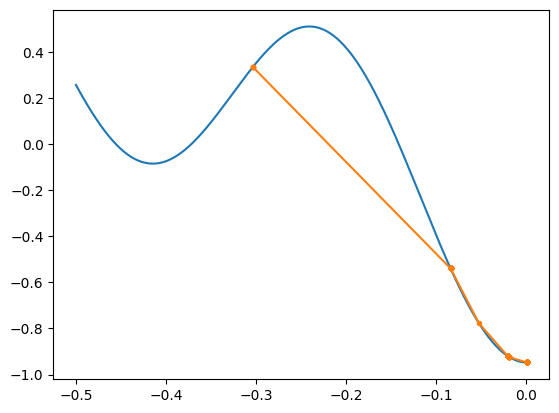

In [ ]:
#--- To keep following outputs, do not run this cell! ---

## Regression multi dimensionnelle

### La dimension classique des données

Dans la majorité des problèmes de traitement de donnée, chaque donnée est un vecteur. Un tenseur d'input a donc la shape:

    X.shape = (nb_data,dim_in)

Et l'output

    Y.shape = (nb_data,dim_out)


Par exemple, on peut chercher à prédire la taille et le poids de souris en fonctions de leur quantité de protéine/lipide/glucide avec lesquelles on les a nouri. Dans ce cas:

* `nb_data` = nombre de souris
* `dim_in` = 3
* `dim_out` = 2


In [ ]:
def make_data(dim_in,dim_out,nb_data = 1000):

    TRUE_W = np.random.randint(1,10,size=(dim_in,dim_out)).astype(np.float32)
    TRUE_b = np.random.randint(1,10,size=(dim_out,)).astype(np.float32)
    TRUE_W=torch.tensor(TRUE_W)
    TRUE_b=torch.tensor(TRUE_b)


    X  = torch.rand(nb_data,dim_in)
    noise   = torch.rand(dim_out)*0.01

    Y = X @ TRUE_W + TRUE_b + noise*0.05
    return X,Y,TRUE_W,TRUE_b

X,Y,_,_=make_data(3,4)

X.shape,Y.shape

### Modèle

#### ♡♡

In [ ]:
class ModelLineaireMultiD:
    def __init__(self,dim_in,dim_out):
        W_data=torch.rand(dim_in,dim_out)*0.2-0.1
        self.W = W_data.clone().requires_grad_(True)
        self.b = torch.zeros([1,dim_out],requires_grad=True)

    def __call__(...

def test():
    dim_in,dim_out=3,4
    X,Y,_,_=make_data(dim_in,dim_out)
    model=ModelLineaireMultiD(dim_in,dim_out)
    Y_pred=model(X)
    print(Y_pred.shape)
    assert Y_pred.shape==Y.shape
test()

    torch.Size([1000, 4])

### Entrainement



#### ♡♡

In [ ]:
def loss_fn(y_true,y_pred):
    return ...


In [ ]:
def train(model, inputs, outputs, learning_rate):
    loss = loss_fn(model(inputs), outputs)
    loss.

    dW=model.W.grad
    db=model.b.grad


    with torch.no_grad():
        model.W-=learning_rate *dW
        model.b-=learning_rate *db

        model.W.grad.zero_()
        model.b.grad.zero_()


    return loss.item()

Remarquons que l'on utilise exactement la même fonction `train` que dans le TP sur la descente de gradient.

In [ ]:
dim_in,dim_out=2,5
X,Y,W_true,b_true=make_data(dim_in,dim_out)

model = ModelLineaireMultiD(dim_in,dim_out)
losses=[]

In [ ]:
fig,ax=plt.subplots()
for epoch in range(500):
    loss =train(model, X, Y, learning_rate=0.3)
    losses.append(loss)
ax.plot(losses)
ax.set_yscale("log")

### Comparons les paramètres appris et les vrais paramètres.

In [ ]:
model.W,W_true

In [ ]:
model.b,b_true

Ils sont très proche. On peut regarder la MSE pour quantifier cette proximité:

In [ ]:
torch.mean((model.W-W_true)**2),torch.mean((model.b-b_true)**2)

Calculons l'erreur de prédiction:

In [ ]:
torch.mean( (X@model.W+model.b - X@W_true - b_true)**2 )

C'est idem à:

In [ ]:
torch.mean( (model(X) - X@W_true - b_true)**2 )

### Question d'unicité

***A vous:*** Est-i possible que les paramètres appris `model.W` et `model.b` diffère beaucoup des vrais paramètres `W_true` et `b_true`? Observez, expliquez.

In [ ]:
dim_in,dim_out=20,2
X,Y,W_true,b_true=make_data(dim_in,dim_out,nb_data=18)

model = ModelLineaireMultiD(dim_in,dim_out)
losses=[]

In [ ]:
fig,ax=plt.subplots()
for epoch in range(1000):
    loss =train(model, X, Y, learning_rate=0.1)
    losses.append(loss)
ax.plot(losses);
ax.set_yscale("log")

In [ ]:
torch.mean((model.W-W_true)**2),torch.mean((model.b-b_true)**2)

Cette fois-ci `model.W` est loin du `W_true` et `model.b` est loin du `b_true`.

Et pourtant le modèle n'est pas mauvais:

In [ ]:
torch.mean( (model(X) - X@W_true - b_true)**2 )

C'est tout à fait normal: On cherche à retrouver `W_true` et `b_true` en partant de

    Y=X@W_true + b_true + noise

Le nombre d'inconnues c'est `dim_in*dim_out+dim_out`.

Le nombre d'observations c'est `nb_data*dim_out`. La meilleure des situations, c'est quand `noise=0` et quand toutes les observations sont linéairement indépendantes. Mais même dans cette situation, si `nb_data` est plus petit que `dim_in+1` on n'a aucune chance de pouvoir retrouver `W_true` et `b_true`.





Les problèmes où `dim_in` est beaucoup plus grand que `nb_data` ne sont pas rares.  par exemple, si les inputs sont des images de 1000 pixels sur 1000 pixels, la dimension de chaque entrée est de 1 million.   Et on n'a pas forcément 1 million d'images à disposition pour entrainer un modèle.

Mais en fait la dimension "implicite" de l'ensemble des images "réelles" est beaucoup plus petite que 1 million.


En deeplearning, il y a tellement de paramètres dans les modèles qu'il n'y a pas unicité du meilleur paramètre. Mais la seule chose qui importe, c'est l'erreur entre `Y_true` et `Y_pred`. Peu importe la paramétrisation du modèle qui donne  `Y_pred`.





Pour finir, rappelons que des pénalisations, comme la pénalisation Ridge, permet de limiter les instabilités liées aux problèmes de grandes dimensions.

## Réseau de neurone

### Introduction

Un réseau de neurone  est une fonction paramétrique, qui est souvent la composition de beaucoup de fonctions intermédiaires (=des layers). Dans ce TP, nous voyons comment créer ces fonctions avec torch. Cela serait idem en tensorflow (avec l'API des classes). On verra ensuite comment ajuster les paramètres pour que le réseau réponde à une tâche précise.   


Commençons par présenter un réseau dense.

***Vocabulaire:*** Dense = fully connected  = multi layer perceptron = MLP. Le mot "feed forwards" est aussi employé pour ces réseaux très simples.  


Dans un réseau dense, un neurone générique  $j$ reçoit des impulsions $(x_i)$  de ces prédécesseurs. Il effectue une somme pondérée de ces impulsions, puis applique une fonction non linéaire $S$ ce qui donne
$$
y_j = S\Big( \sum_{i: i\to j}  x_i\,  w_{ij} \Big)
$$
Il transmet alors cette nouvelle impulsion $y_j$  à tous ses successeurs.



La fonction $S$ est appelée fonction d'activation. Elle est nulle ou négative quand sont entrée est trop faible.
  C'est souvent  une des fonctions suivantes:
    
*  Sigmoïde: $ \frac 1 {1+e^{-x}}$.
*  Relu: $x1_{\{x>0\}}$
*  Arctangente

L'important, c'est que ces fonctions censurent  les petites valeurs et qu'elles soient non-linéaire. Il est naturel de les choisir croissantes. Mais: pour certaines utilisations, on s'amuse à mettre des fonctions d'activations qui ne le sont pas, comme le `sinus` des réseau de neurone "SIREN".
  




In [ ]:
x=torch.linspace(-4,4,100)

for S,name in [
    (torch.relu,"relu"),
    (torch.sigmoid,"sigmoid"),
    (torch.tanh,"tanh"),
    (torch.selu,"selu"),
    (torch.nn.functional.softplus,"softplus"),
    (torch.nn.functional.gelu,"gelu"),
    (torch.sin,"sin"),
    ]:
    y=S(x)
    plt.plot(x,y,label=name)
plt.legend();

Remarquez que la plupart sont croissantes, sauf ...

### Enchainons deux couches

Les neurones sont regroupés par couches. Dans un réseau dense:
* Les neurones d'une couche reçoivent les impulsions de tous les neurones de la couche précédente
* Envoie leur impulsion à tous les neurones de la couche suivante.

$$
\forall j \in \text{Couche}_1 \qquad y_j = S\Big( \sum_{i}  x_i\,  w_{ij} +b_i  \Big)
$$
$$
\forall k \in \text{Couche}_2 \qquad z_k = S\Big( \sum_{j}  y_j \,  w'_{jk} + b'_j\Big)
$$

On peut aussi écrire cela avec des produits matriciels (notés $@$):
$$
y = S(x @ w+b )
$$
$$
z = S( y @ w' + b')
$$

## Implémentations

In [ ]:
def rand_mat(dim_in,dim_out):
    return torch.rand(dim_in,dim_out)*0.2-0.1

### En une classe

#### ♡♡♡

In [ ]:
class ModelNN:
    def __init__(self,dim_in,dim_out,dim_hidden=20):

        self.W1 = rand_mat(dim_in,dim_hidden).requires_grad_(True)
        self.b1 = torch.zeros([1,dim_hidden],requires_grad=True)

        self.W2 = rand_mat(dim_hidden,dim_out).requires_grad_(True)
        self.b2 = torch.zeros([1,dim_out],requires_grad=True)


    def __call__(self, X ):
        X = ...
        return X

In [ ]:
def test():
    dim_in,dim_out=3,4
    batch_size=1
    X=torch.rand(batch_size,dim_in)
    model=ModelNN(dim_in,dim_out)
    Y_pred=model(X)
    print(Y_pred.shape)
    assert Y_pred.shape==(batch_size,dim_out)
test()

In [ ]:
#--- To keep following outputs, do not run this cell! ---

torch.Size([1, 4])


***Attention:*** Notre modèle ci-dessus ne sort que des valeurs positives à cause du dernier `relu`. Ce n'est pas bon si on doit apprendre des données signées.

La dernière fonction d'activation doit s'adapter aux données cible `Y`:
* Si les données cibles sont positives: `relu`
* Si elles sont signées: `rien`
* Si elles sont dans $[0,1]$: `sigmoid`
* Si elles sont dans $[-1,1]$: `artan`
* Si elles sont dans $[-2,2]$: ...



Par contre, la fonction d'activation sur les couches cachées, c'est au choix de l'architecte. Mettre deux layer linéaires successifs sans fonction d'activation, c'est <font color="red"> □ □ □ </font>






### Avec une sous classe

In [ ]:
class LayerLinear:
    def __init__(self,dim_in,dim_out):

        self.W1 = rand_mat(dim_in,dim_out).requires_grad_(True)
        self.b1 = torch.zeros([1,dim_out],requires_grad=True)

    def __call__(self, X ):
        return X@self.W1 + self.b1



class ModelNN:
    def __init__(self,dim_in,dim_out,dim_hidden=20):

        self.layer1 = LayerLinear(dim_in,dim_hidden)
        self.layer2 = LayerLinear(dim_hidden,dim_out)


    def __call__(self, X ):
        X = torch.relu(self.layer1(X))
        X = torch.relu(self.layer2(X))
        return X



def test():
    dim_in,dim_out=3,4
    batch_size=1
    X=torch.rand(batch_size,dim_in)
    model=ModelNN(dim_in,dim_out)
    Y_pred=model(X)
    assert Y_pred.shape==(batch_size,dim_out)
test()

### Utilisation des layers existant



In [ ]:
class ModelNN:
    def __init__(self,dim_in,dim_out,dim_hidden=20):

        self.layer1 = torch.nn.Linear(dim_in,dim_hidden)
        self.layer2 = torch.nn.Linear(dim_hidden,dim_out)


    def __call__(self, X ):
        X = torch.relu(self.layer1(X))
        X = torch.relu(self.layer2(X))
        return X



def test():
    dim_in,dim_out=3,4
    batch_size=1
    X=torch.rand(batch_size,dim_in)
    model=ModelNN(dim_in,dim_out)
    Y_pred=model(X)
    assert Y_pred.shape==(batch_size,dim_out)


test()


### Une meilleure initialisation


Avec `torch.nn.Linear` les poids du kernel sont tirés aléatoirement entre `-lim` et `+lim` avec
$$
\mathtt{lim}={1\over \sqrt{\mathtt{dim\_in}}}
$$

Vérifions cela:

In [ ]:
dim_in=100
layer=torch.nn.Linear(dim_in,50)
kernel=list(layer.parameters())[0]
kernel.shape

In [ ]:
kernel_flat=torch.reshape(kernel,[-1]).detach().numpy()
kernel_flat.shape

In [ ]:
fig,ax=plt.subplots()
ax.hist(kernel_flat)
ax.axvline(1/np.sqrt(dim_in),color="k")
ax.axvline(-1/np.sqrt(dim_in),color="k")





Pourquoi cette quantité. Voici l'argument mathématique: on voudrait que la variance du signal reste constante au fur et à mesure de la traversée des couches denses; car dans le cas contraire, on risque de trop saturer les fonctions d'activations et d'avoir des gradients trop grands, donc des nan qui apparaissent (beaucoup de multiplication dans le calcul des gradients).


Regardons la j-ième coordonnée d'une sortie d'une couche dense, avant activation:  
$$
(xW)_j = \sum_{i=1}^{\mathtt {dim\_in}} x_i W_{ij}
$$
Faisons les hypothèses suivantes
* les $x_i$ sont centrés réduits
* les $W_{ij}$ sont iid centrées (on choisira leur écart type après)
* $x$ est indépendant de $W$.

Nous devons calculer la variance de $(xW)_j$. Mais commençons par l'espérance:



#### ♡♡♡

Donc la variance, c'est l'espérance du carré

$$
\mathbf V[(xW)_j]=\mathbf E \Big[\Big(\sum_{i=1}^{\mathtt {dim\_in}} x_i W_{ij}\Big)^2\Big]=
\mathbf E \Big[\sum_{i=1}^{\mathtt {dim\_in}}\sum_{i'=1}^{\mathtt {dim\_in}} x_i W_{ij} \color{red}{\square \square \square}\Big]
$$


Mais dès que $i\neq i'$, on peut séparer l'espérance en un produit de deux espérances qui vaut s'annule. Donc

$$
\mathbf V[(xW)_j]= \color{red}{\square \square \square}
$$
$$
=\color{red}{\square \square \square}
$$
$$
=\color{red}{\square \square \square}
$$

Pour que l'écart type reste égal à $1$ il faudrait que l'écart type de $W_{ij}$ soit égale à:
$$
 {1\over  \sqrt{\mathtt {dim\_in}}}
$$
Or si $W_{ij}$ suivent des lois uniformes sur $[-\mathtt{lim},\mathtt{lim}]$ leur écart type est
$$
{2\mathtt{lim} \over \sqrt{12}}.
$$
Il faudrait donc prendre
$$
\mathtt{lim}= {\sqrt{12} \over 2 \sqrt{\mathtt {dim\_in}} }
$$
Torch a fait un choix plus simple, mais proche. Ses poids sont trop petit d'un facteur:

In [ ]:
2/np.sqrt(12)

 La variance va baisser un peu à chaque couche. Si on n'enchaine pas 1000 couches, ça va... Sinon il faudrait faire une initialisation plus précise en créant son propre layer.  

***Pour aller plus loin:*** Mais lors de la rétro-propagation, les gradients se propagent dans l'autre sens, ils sont multipliés par $W^T$. Donc certains auteurs disent qu'il faudrait aussi que l'écart type des gradients reste autour de 1. Il faudrait donc prendre
$$
\mathtt{lim}={1\over \sqrt{\mathtt{dim\_out}}}
$$
Comme on ne peut pas faire les deux, on fait parfois le compromis:
$$
\mathtt{lim}={1\over \sqrt{\mathtt{dim\_in}+\mathtt{dim\_out}}}
$$

Cette initialisation a été proposée par Xavier Glorot; on l'appelle  parfois "Xavier initialization", parfois "glorot_uniform".

### L'ordre des multiplications


In [ ]:
dim_in,dim_hidden,dim_out=5,10,4
batch_size=1
X=torch.rand(batch_size,dim_in)

model=ModelNN(dim_in,dim_out,dim_hidden=dim_hidden)
model(X)



Dans le programme précédent le flow des données a les dimensions suivantes

    dim_in --> dim_hidden --> dim_out
      5            10           4




Observons les dimensions des matrices (=kernel) qui permettent de modifier les dimensions

In [ ]:
for p in model.layer1.parameters():
    print(p.shape)

In [ ]:
for p in model.layer2.parameters():
    print(p.shape)

Les kernel ont comme shape

    W1.shape = (10,5) = (dim_hidden,dim_in)
    W2.shape =(4,10) = (dim_out,dim_hidden)
    
On en déduit que ces kernels se multiplient  à droite des données:


    dim_in --> dim_hidden --> dim_out
      5            10           4
      X           Y=W1@X+b1     Z=W2@Y+b2               


Dommage, dans notre implémentation `LayerLinear` on avait choisi l'ordre inverse, ce qui semblait plus élégant (et c'est aussi le choix qu'a fait tensorflow).


## Récolter tous les paramètres

Pour pouvoir entrainer un modèle, il faut pouvoir modifier l'ensemble de ses paramètres par une descente de gradient. Cela nécessite de connaitre la liste de l'ensemble de ces paramètres. Dans nos implémentations précédentes ce n'était pas facile. Il fallait créer cette liste à la main. Torch a une astuce:

### Hériter c'est pratique

Modifions très légèrement l'implémentation: on va hériter de `torch.nn.Module`

In [ ]:
class ModelNN(torch.nn.Module):

    def __init__(self,dim_in,dim_out,dim_hidden=20):
        super().__init__()

        self.layer1 = torch.nn.Linear(dim_in,dim_hidden)
        self.layer2 = torch.nn.Linear(dim_hidden,dim_out)


    def forward(self, X ):
        X = torch.relu(self.layer1(X))
        X = torch.relu(self.layer2(X))
        return X

Et maintenant, il est très facile de récolter tous les paramètres qui apparaissent dans le modèle:

In [ ]:
dim_in,dim_out=3,4
batch_size=1
X=torch.rand(batch_size,dim_in)
model=ModelNN(dim_in,dim_out)

for p in model.parameters():
    print(p.shape)

Remarque: l'habitude en torch c'est d'implémenter une méthode `forward`. Mais clairement, dans la class mère (`torch.nn.Module`), la méthode `__call__` appelle la méthode `forward` définit par l'utilisateur.

### Fonction d'activation paramétrique

On peut aussi définir les fonctions d'activations dans le constructeur, comme si c'étaient des layers. Pour une fonction `relu` cela n'a pas d'intérêt. Mais la fonction `Parametric Relu` renferme un paramètre (entrainable). Il est donc indispensable d'initialiser dans le constructeur:

In [ ]:
class ModelNN(torch.nn.Module):

    def __init__(self,dim_in,dim_out,dim_hidden=20):
        super().__init__()

        self.layer1 = torch.nn.Linear(dim_in,dim_hidden)
        self.layer2 = torch.nn.Linear(dim_hidden,dim_out)

        self.S1=torch.nn.PReLU()
        self.S2=torch.nn.PReLU()


    def forward(self, X ):
        X = self.S1(self.layer1(X))
        X = self.S2(self.layer2(X))
        return X


dim_in,dim_out=3,4
batch_size=1
X=torch.rand(batch_size,dim_in)
model=ModelNN(dim_in,dim_out)

for p in model.parameters():
    print(p.shape)

Observons cette fonction `PReLU`:

In [ ]:
S=torch.nn.PReLU()
x=torch.linspace(-3,3,100)
plt.plot(x,S(x).detach());

#### ♡

Voici son paramètres. A quoi correspond-il ?

C'est <font color="red"> □ □ □ </font>

In [ ]:
for p in S.parameters():
    print(p)

On remarque que:
* les "parameters" (="trainable_variables") ont pour attribut `requires_grad=True`
* Qu'ils sont hébergé par le bon `device`
* Qu'ils ont la shape voulue

### Une liste de layer

Notez l'utilisation de `nn.ModuleList`

In [ ]:
class ModelTorchDeep(torch.nn.Module):
    def __init__(self,dim_in,dim_hidden,dim_out,nb_layer):
        super().__init__()
        self.initial_layer=torch.nn.Linear(dim_in,dim_hidden)

        #attention, un liste classique ne marche pas
        self.lays=torch.nn.ModuleList()
        for _ in range(nb_layer):
            self.lays.append(torch.nn.Linear(dim_hidden,dim_hidden))

        self.final_layer=torch.nn.Linear(dim_hidden,dim_out)

    def forward(self,X):
        X=torch.relu(self.initial_layer(X))

        for lay in self.lays:
            X=torch.relu(lay(X))

        return self.final_layer(X)


model=ModelTorchDeep(2,20,2,10)
for p in model.parameters():
    print(p.shape)

### Ajouter des paramètres perso

In [ ]:
class ModelSpecial(torch.nn.Module):

    def __init__(self,dim_in,dim_out,dim_hidden=20):
        super().__init__()

        self.layer1 = torch.nn.Linear(dim_in,dim_hidden)
        self.layer2 = torch.nn.Linear(dim_hidden,dim_out)

        self.mult_param1=torch.nn.Parameter(torch.rand(1,dim_hidden))
        self.mult_param2=torch.nn.Parameter(torch.rand(1,dim_hidden))


    def forward(self, X ):
        X = torch.relu(self.layer1(X)) * self.mult_param1
        X = torch.relu(self.layer2(X)) * self.mult_param2
        return X

model=ModelSpecial(2,2)
for p in model.parameters():
    print(p.shape,p.requires_grad)

In [ ]:
model=ModelSpecial(2,2)
for k,p in model.state_dict().items():
    print(k,p.shape)

Attention, si on avait simplement déclaré

    self.mult_param1=torch.tensor(torch.rand(1,dim_hidden),requires_grad=True)

ce paramètre n'aurait pas été récolté dans `model.parameters()`

### Modifier un modèle tout d'un coup

On peut rendre tous les paramètres non-entrainable d'un seul coup:

In [ ]:
model=ModelSpecial(2,2)
model.requires_grad_(False)

for p in model.parameters():
    print(f"p.requires_grad:{p.requires_grad}, p.device:{p.device},p.dtype:{p.dtype}")

On peut transférer tous les paramètres sur le gpu d'un seul coup:

In [ ]:
if torch.cuda.is_available():
    model=model.to("cuda")
    for p in model.parameters():
        print(f"p.requires_grad:{p.requires_grad}, p.device:{p.device},p.dtype:{p.dtype}")

In [ ]:
model=model.to(dtype=torch.float16)
for p in model.parameters():
    print(f"p.requires_grad:{p.requires_grad}, p.device:{p.device},p.dtype:{p.dtype}")

Remarque: Le fait de changer un modèle en `float16` s'appelle la quantisation. Cela permet d'avoir un modèle qui prend moins de place et s'évalue plus vite. Pratique pour un téléphone.


 En général, cette quantisation  se faire  sur les modèles déjà entrainés, car `float16` n'offre pas une précision suffisante pour la descente de gradient.

## On peut tout faire

Imaginons qu'on vous commande un modèle qui analyse les couples de la manière suivante:

Le "descriptif" d'un humain est un vecteur de dimension 5 contenant les caractéristiques suivantes:
* Poids
* Taille
* Consommation de vin  en litre/an
* Consommation de bière  en litre/an
* Consommation d'eau  en litre/an


Le modèle a comme entrée:
* `x1`: Le descriptif de l'homme
* `x2`: Le descriptif de la femme

Et en sortie:
* `y1`: La probabilité d'avoir 0,1,2,3,4+ enfants  (4+ = 4 enfants ou plus)
* `y2`: la longévité du couple (en année de vie commune)
* `y3`: La probabilité de faire un voyage dans le Bordelais.



#### ♡♡♡

Complétez le code du constructeur pour que le programme test fonctionne, sans toucher à la méthode forward!

In [ ]:
class ModelCoupleWine(torch.nn.Module):

    def __init__(self):
        super().__init__()

        self.preprocessing_layers1=torch.nn.Linear(?,16)
        self.preprocessing_layers2=torch.nn.Linear(?,16)


        self.common_layers= ...
        for i in range(3):
            self.common_layers.append(torch.nn.Linear(32,32))


        self.separation_layer=torch.nn.Linear(?,?)


        self.postprocessing_layers= ...
        for i in range(4):
            self.postprocessing_layers.append(torch.nn.Linear(32,32))


        etc.



    def forward(self,x1,x2):

        x1=self.preprocessing_layers1(x1)
        x2=self.preprocessing_layers1(x2)

        x12=torch.concat([x1,x2],dim=1)

        for lay in self.common_layers:
            x12=lay(x12)

        y123=self.separation_layer(x12)

        y1=y123[:,:32]
        y2=y123[:,32:64]
        y3=y123[:,64:]

        for lay in self.postprocessing_layers:
            y1=lay(y1)
            y2=lay(y2)
            y3=lay(y3)

        y1=self.final_layer1(y1)
        y2=self.final_layer2(y2)
        y3=self.final_layer3(y3)

        return y1,y2,y3

In [ ]:
model = ModelCoupleWine()

x1=torch.tensor([[78.,178,34,54,679]])  #poids kg, taille cm, vin litre, bière litre, eau litre
x2=torch.tensor([[56.,154,56,12,1043]])


y1,y2,y3=model(x1,x2)
assert y1.shape==(1,5)
assert y2.shape==(1,1)
assert y3.shape==(1,1)

#### ♡♡♡

Recopiez votre code précédent, puis modifiez la méthode `forward` pour ajouter des fonctions d'activations convenables (relisez bien l'énoncé).

In [ ]:
class ModelCoupleWine ...


In [ ]:
#--- To keep following outputs, do not run this cell! ---

y1.shape:torch.Size([1, 5]), y2.shape:torch.Size([1, 1]), y3.shape:torch.Size([1, 1])


    y1.shape:torch.Size([1, 4]), y2.shape:torch.Size([1, 1]), y3.shape:torch.Size([1, 1])
